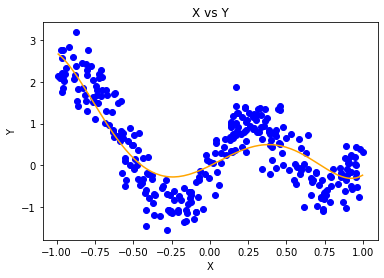

In [9]:

 
import numpy as np
 
import math
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_csv(r"C:\Users\Asus\Downloads\ML-HW01\ML-HW01\dataset1\dataset1.csv")
    
df.sort_values(df.columns[0], 
                   axis=0,
                   inplace=True)
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
         
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     
    # function to normalize X_transform
     
    def normalize( self, X ) :
         
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
         
        return X
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
     
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
        # normalize X_transform
         
        X_normalize = self.normalize( X_transform )
                 
        # gradient descent learning
     
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = h - self.Y
             
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
         
        return self
     
    # predict
     
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( X )
         
        X_normalize = self.normalize( X_transform )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   

    # Create dataset
    L= np.array(list(df.x))
    O= np.reshape(L, (-1, 1))
    K = list(df.x[0:7:1])
    X = np.reshape(L, (-1, 1))
     
    Y = np.array(list(df.y))
  
    # model training
     
    model = PolynomailRegression( degree = 5, learning_rate = 0.01, iterations = 10000 )
 
    model.fit( X, Y )
     
    # Prediction on training set
 
    Y_pred = model.predict( X )
     
    # Visualization
     
    plt.scatter( X, Y, color = 'blue' )
     
    plt.plot( X, Y_pred, color = 'orange' )
     
    plt.title( 'X vs Y' )
     
    plt.xlabel( 'X' )
     
    plt.ylabel( 'Y' )
     
    plt.show()
   # print(X)
    #print(Y)
if __name__ == "__main__" :

    main()